AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 5.0 		 0.49 		 0.23 |
| 5.0 		 0.36 		 0.16 |
| 5.0 		 0.39 		 0.16 |
| 5.0 		 0.36 		 0.32 |
| 5.0 		 0.34 		 0.17 |
| 5.0 		 0.29 		 0.22 |
| 5.0 		 0.38 		 0.15 |
| 5.0 		 0.34 		 0.16 |
| 5.0 		 0.23 		 0.66 |
| 5.0 		 0.29 		 0.39 |
| 5.0 		 0.23 		 0.16 |
| 5.0 		 0.26 		 0.68 |
| 5.0 		 0.77 		 0.28 |
| 5.0 		 0.26 		 0.28 |
| 5.0 		 0.29 		 0.58 |
| 5.0 		 0.42 		 0.19 |
| 5.0 		 0.28 		 0.67 |
| 5.0 		 0.24 		 0.61 |
| 5.0 		 0.39 		 0.22 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of D is: 0.21
The s.d. of R is: 0.19
-------------------------------------
The mean of M is: 5.0
The mean of D is: 0.34
The mean of R is: 0.4
-------------------------------------


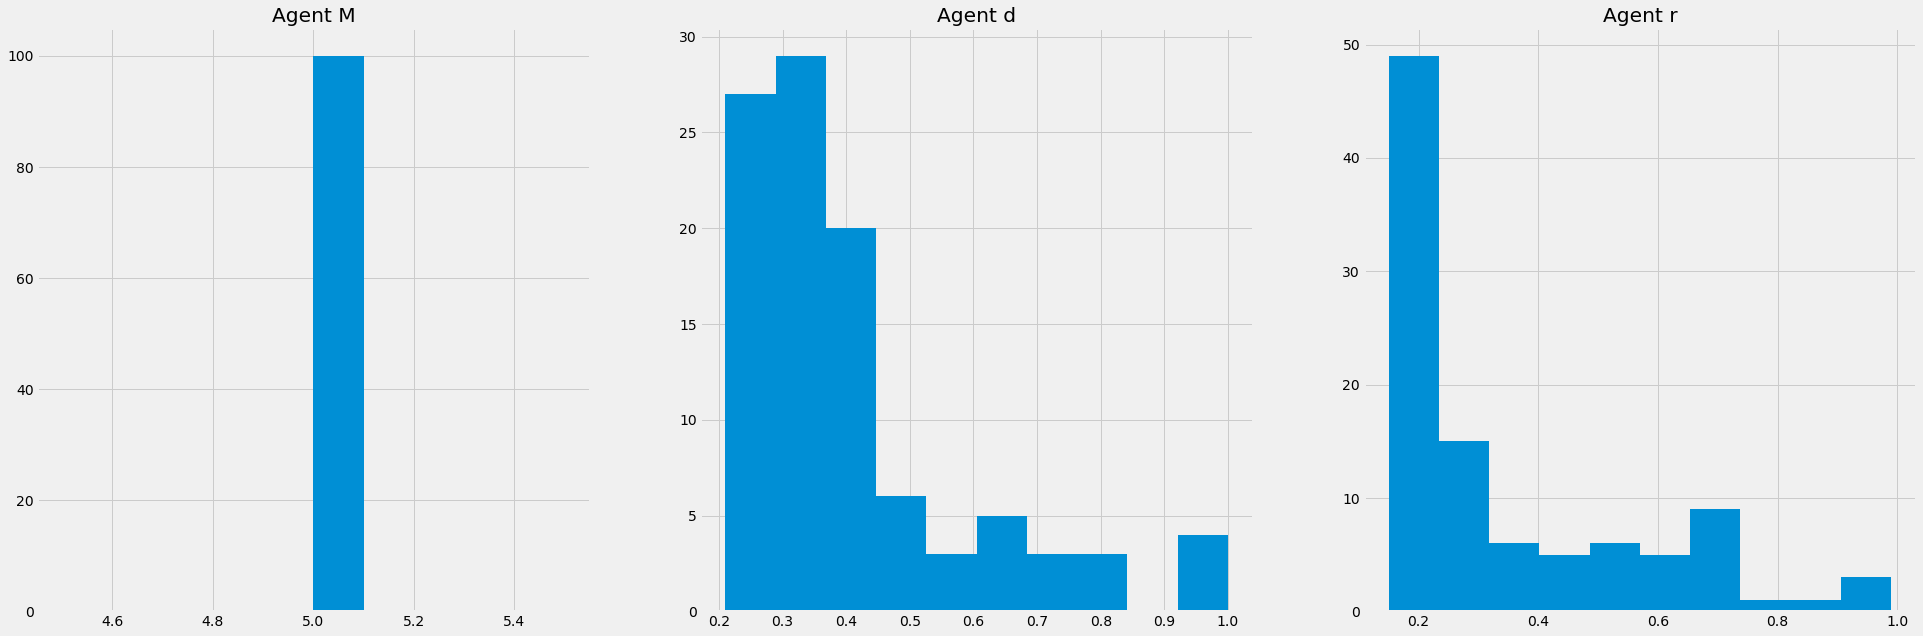

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 3.6, Temptation: 4.8, Sucker: 0, Punishment: 1.2
Agent 1 playing Agent 0: Reward: 2.6, Temptation: 3.4, Sucker: 0, Punishment: 0.8
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 3.6, Temptation: 4.8, Sucker: 0, Punishment: 1.2
Agent 2 playing Agent 0: Reward: 2.8, Temptation: 3.6, Sucker: 0, Punishment: 0.8
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 3.6, Temptation: 4.8, Sucker: 0, Punishment: 1.2
Agent 3 playing Agent 0: Reward: 3.4, Temptation: 5.0, Sucker: 0, Punishment: 1.6
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 3.6, Temptation: 4.8, Sucker: 0, Punishment: 1.2
Agent 4 playing Agent 

No handles with labels found to put in legend.


    S.D.  Counts
0    0.5     270
1    0.6     255
2    0.7     259
3    0.8     234
4    0.9     225
5    1.0     202
6    1.1     187
7    1.2     158
8    1.3     126
9    1.4     104
10   1.5      99
11   1.6      82
12   1.7      50
13   1.8      48
14   1.9      45
15   2.0      33
16   2.1      40
17   2.2      25
18   2.3      19
19   2.4      10
20   2.5      10
21   2.6       7
22   2.7       5
23   2.8       1
24   2.9       0
25   3.0       0


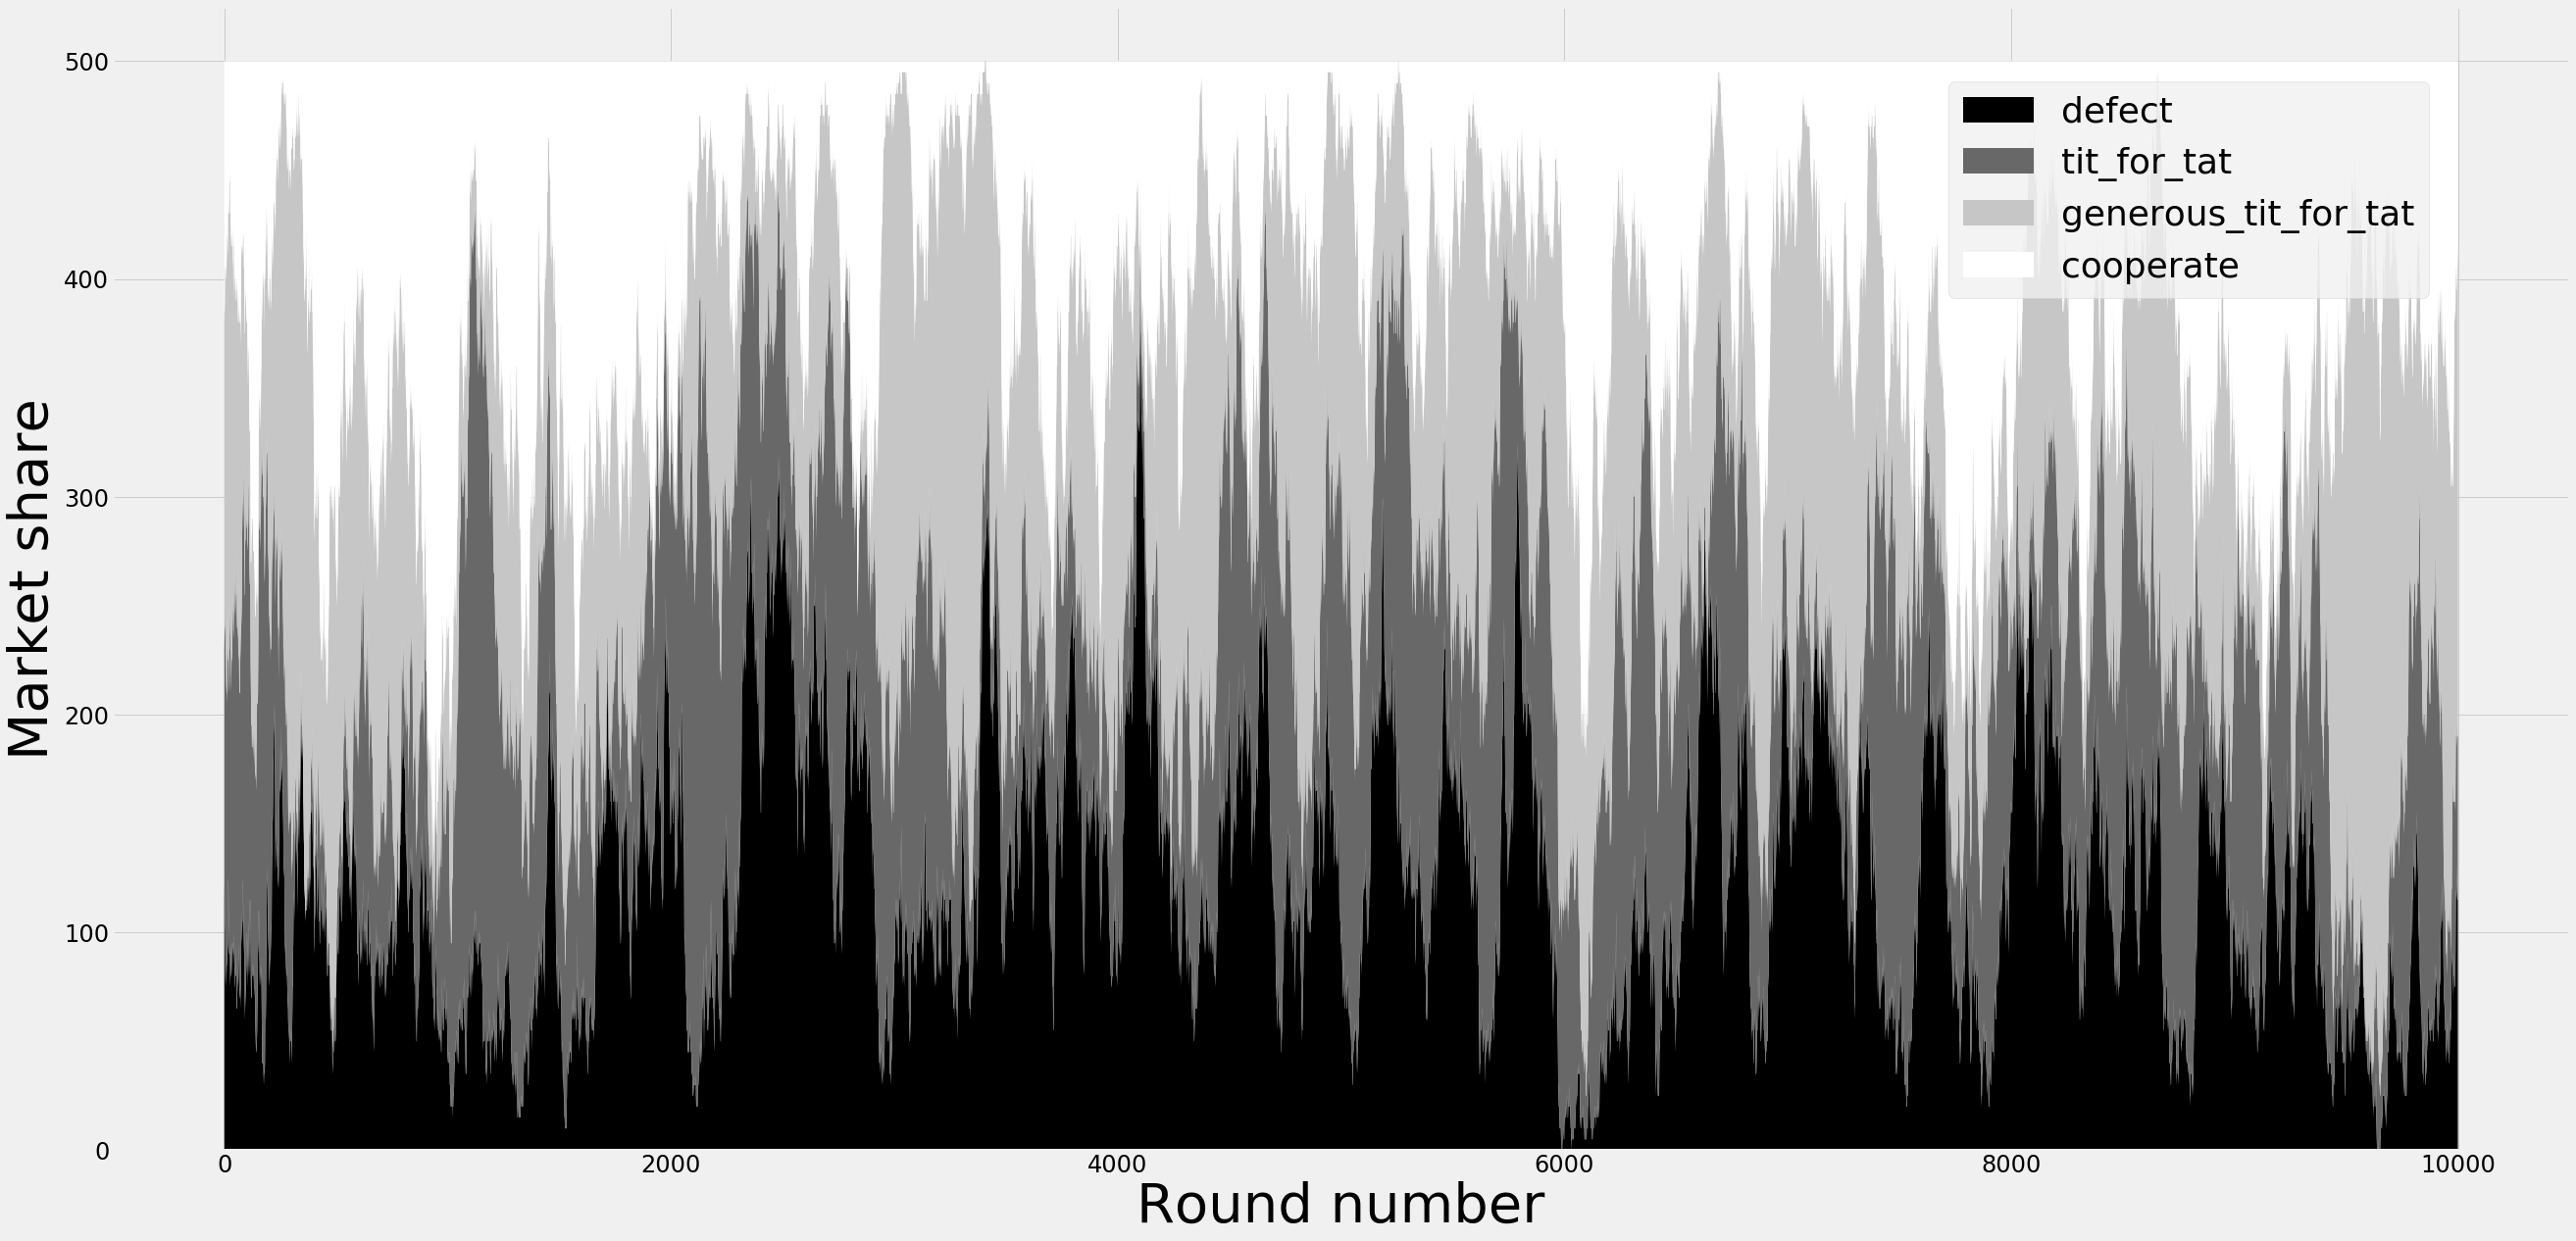

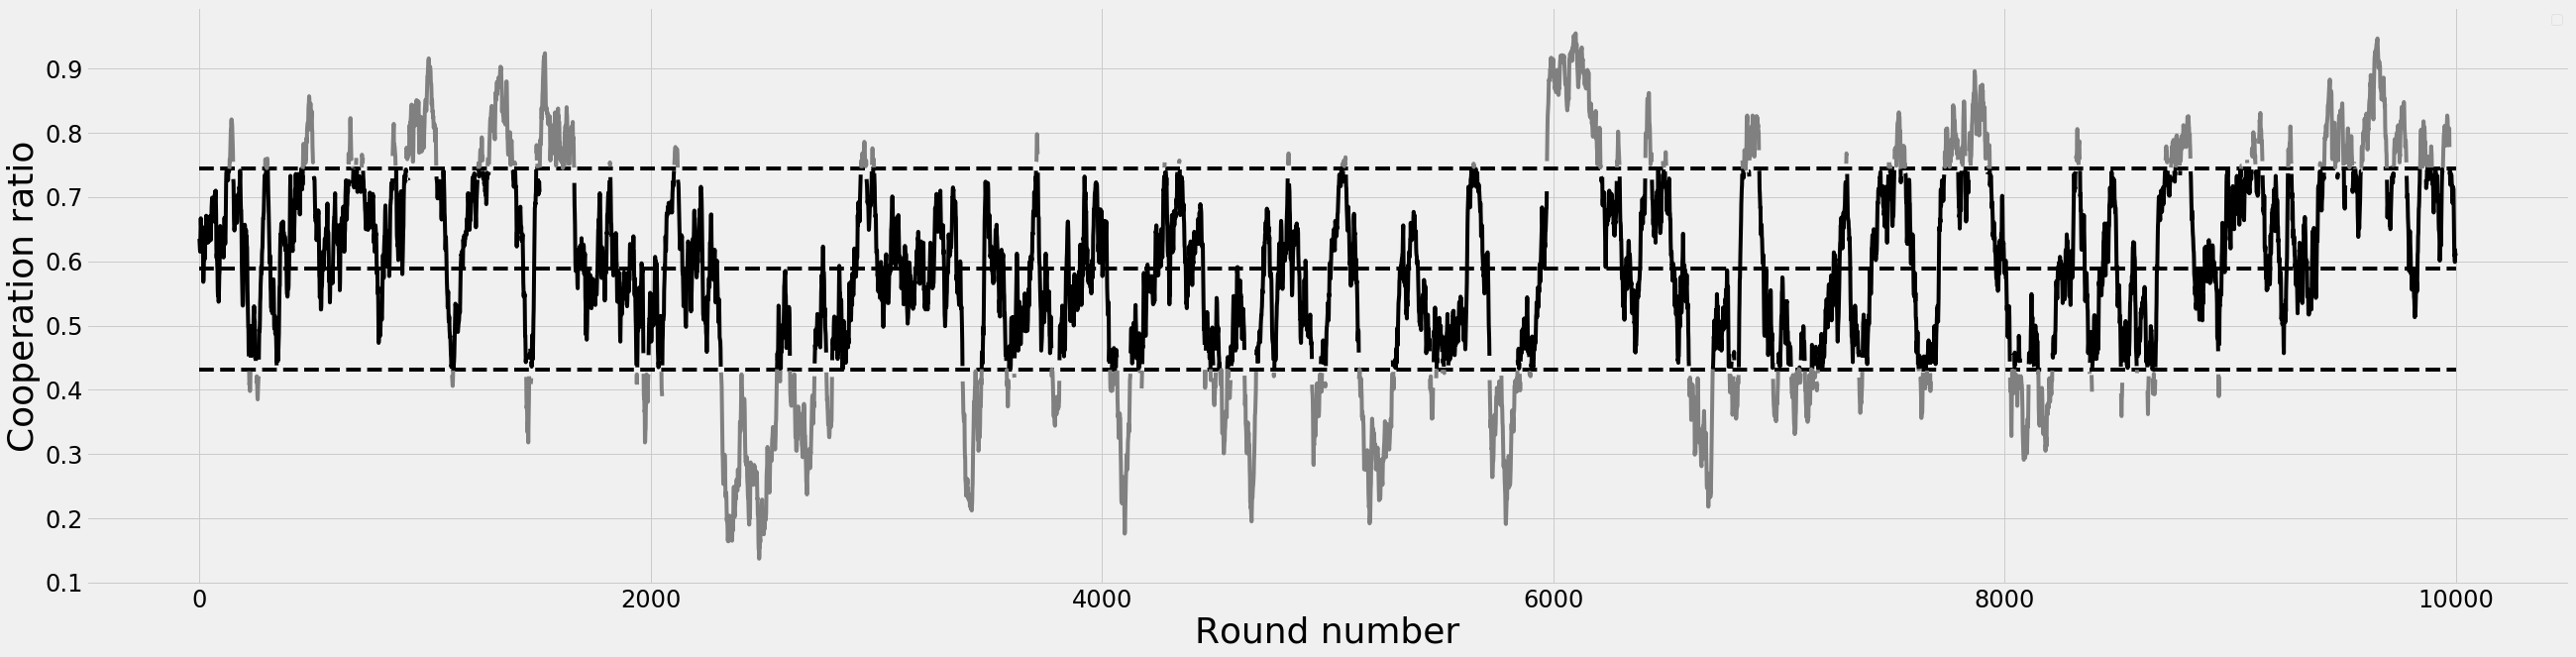

In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 2
np.random.seed(seed)

tour_type = "pareto_dr_min"
M = [5, 1/10000]
R = ['power', 0.15, 1]
D = ['power', 0.2, 1]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed))